In [ ]:
from google.colab import drive
drive.mount('/content/drive')

base_dir = "/content/drive/MyDrive/nlp_final"

Mounted at /content/drive


In [ ]:
!pip -q install -U transformers datasets evaluate accelerate scikit-learn

import os, numpy as np
from datasets import load_dataset, DatasetDict
from sklearn.metrics import accuracy_score, f1_score, classification_report

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.6/511.6 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.9/380.9 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 38.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.7/47.7 MB 12.6 MB/s eta 0:00:00


## 📊 DATA – Load & thống kê

In [ ]:
from datasets import load_dataset, DatasetDict, ClassLabel

# ===========================
# 1.1 Tải và in dữ liệu thô
# ===========================
ds_raw = load_dataset("minhtoan/vietnamese-comment-sentiment")
train = ds_raw["train"]

print("📌 5 dòng dữ liệu THÔ ban đầu:")
for i in range(5):
    print({
        "Content": train[i]["Content"],
        "BriefContent": train[i]["BriefContent"],
        "Sentiment": train[i]["Sentiment"]
    })
print("-" * 60)

# ===========================
# 1.2 Tiền xử lý dữ liệu
# ===========================
def pick_text(ex):
    txt = (ex.get("Content") or "").strip()
    if not txt:
        txt = (ex.get("BriefContent") or "").strip()
    return {"text": txt}

label_map = {"Tiêu cực":0, "Trung lập":1, "Tích cực":2}
def map_label(ex):
    return {"label": label_map.get(ex.get("Sentiment",""), None)}

train = train.map(pick_text)
train = train.map(map_label)
train = train.filter(lambda x: bool(x["text"]) and x["label"] is not None)

print("📌 5 dòng dữ liệu SAU TIỀN XỬ LÝ:")
for i in range(5):
    print({
        "text": train[i]["text"],
        "label": train[i]["label"]
    })
print("-" * 60)

# ===========================
# 1.3 Ép kiểu + chia 80/10/10
# ===========================
label_feature = ClassLabel(names=["Tiêu cực","Trung lập","Tích cực"])
train = train.cast_column("label", label_feature)

train_test = train.train_test_split(test_size=0.1, seed=42, stratify_by_column="label")
valid_test = train_test["test"].train_test_split(test_size=0.5, seed=42, stratify_by_column="label")

ds = DatasetDict({
    "train": train_test["train"],
    "validation": valid_test["train"],
    "test": valid_test["test"],
})

print("📌 Unique labels (train):", ds["train"].features["label"])
print("📌 Số lượng mẫu:")
print({split: ds[split].num_rows for split in ds})

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

vietnamese-comment-sentiment.csv:   0%|          | 0.00/35.2M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/13132 [00:00<?, ? examples/s]

📌 5 dòng dữ liệu THÔ ban đầu:
{'Content': '-  NĐTNN mua ròng trở  lại trên sàn HOSE về  mặt KLGD sau 2 phiên bán ròng , \nđặc biệt trên HNX họ  đã mua ròng đến 13 phiên liên tiếp.  Khối Tự  doanh cũng \nmua ròng tuần thứ  6 liên tiếp.  Bên cạnh đó các mã BCs lớn như VCB, GAS, \nVNM, PVD đều tăng mạnh, thậm chí tăng trần đã hỗ  trợ  mạnh mẽ  thị  trường.\nMã GAS được thông tin là Công ty PV GAS sẽ mua lại 10 triệu CP làm CP Quỹ\nvới giá không vượt quá 100 ngàn đã giúp mã này có 1 phiên tăng hết biên độ.\n-  Xu hướng tăng điểm của thị  trường đã được xác nhận bởi các tín hiệu kỹ  thuật \nnên xu hướng hiện tại vẫn là tích cực.\nMức  hỗ  trợ  của  thị  trường  hiện  tại  là  540  điểm,  HNX-Index  là  82-83  điểm. \nKháng cự là 585-590 và 88 điểm.\n-  Các NĐT vẫn có thể  tiếp tục nắm giữ  và tích lũy thêm CK vào DM của mình, \nđặc biệt ở những phiên thị trường điều chỉnh.\n-  Tuy xu hướng thị  trường là tích cực nhưng sự  phân hóa khá mạnh trên sàn khi \nnhững mã CP thuộc nhóm Ngân hàng và

Map:   0%|          | 0/13132 [00:00<?, ? examples/s]

Map:   0%|          | 0/13132 [00:00<?, ? examples/s]

Filter:   0%|          | 0/13132 [00:00<?, ? examples/s]

📌 5 dòng dữ liệu SAU TIỀN XỬ LÝ:
{'text': '-  NĐTNN mua ròng trở  lại trên sàn HOSE về  mặt KLGD sau 2 phiên bán ròng , \nđặc biệt trên HNX họ  đã mua ròng đến 13 phiên liên tiếp.  Khối Tự  doanh cũng \nmua ròng tuần thứ  6 liên tiếp.  Bên cạnh đó các mã BCs lớn như VCB, GAS, \nVNM, PVD đều tăng mạnh, thậm chí tăng trần đã hỗ  trợ  mạnh mẽ  thị  trường.\nMã GAS được thông tin là Công ty PV GAS sẽ mua lại 10 triệu CP làm CP Quỹ\nvới giá không vượt quá 100 ngàn đã giúp mã này có 1 phiên tăng hết biên độ.\n-  Xu hướng tăng điểm của thị  trường đã được xác nhận bởi các tín hiệu kỹ  thuật \nnên xu hướng hiện tại vẫn là tích cực.\nMức  hỗ  trợ  của  thị  trường  hiện  tại  là  540  điểm,  HNX-Index  là  82-83  điểm. \nKháng cự là 585-590 và 88 điểm.\n-  Các NĐT vẫn có thể  tiếp tục nắm giữ  và tích lũy thêm CK vào DM của mình, \nđặc biệt ở những phiên thị trường điều chỉnh.\n-  Tuy xu hướng thị  trường là tích cực nhưng sự  phân hóa khá mạnh trên sàn khi \nnhững mã CP thuộc nhóm Ngân hàng và

Casting the dataset:   0%|          | 0/9994 [00:00<?, ? examples/s]

📌 Unique labels (train): ClassLabel(names=['Tiêu cực', 'Trung lập', 'Tích cực'])
📌 Số lượng mẫu:
{'train': 8994, 'validation': 500, 'test': 500}


# 🧪 SYNTHETIC DATA – Prompt, sinh dữ liệu & so sánh

### Ví dụ dữ liệu synthetic (tiêu cực)


In [ ]:
import json

synthetic_path = f"{base_dir}/dataset/synthetic/synthetic_negative.jsonl"

synthetic_samples = []
with open(synthetic_path, "r", encoding="utf-8") as f:
    for i, line in enumerate(f):
        if i >= 5: break
        synthetic_samples.append(json.loads(line))

print("📌 5 mẫu synthetic tiêu cực:")
synthetic_samples

📌 5 mẫu synthetic tiêu cực:


[{'text': 'Mình thật sự thất vọng vì chất lượng dịch vụ lần này quá tệ, không giống như những gì đã quảng cáo trước đó.',
  'label': 0},
 {'text': 'Thái độ nhân viên quá thiếu chuyên nghiệp, hỏi gì cũng trả lời qua loa làm mình mất hết thiện cảm.',
  'label': 0},
 {'text': 'Sản phẩm nhận được không giống hình, chất lượng kém và có dấu hiệu đã qua sử dụng khiến mình rất bực.',
  'label': 0},
 {'text': 'Trải nghiệm hôm nay cực kỳ tệ, chờ đợi quá lâu nhưng cuối cùng vẫn không giải quyết được vấn đề.',
  'label': 0},
 {'text': 'Mình thấy giá thì cao mà chất lượng thì không tương xứng, thật sự không muốn quay lại lần nào nữa.',
  'label': 0}]

### Load synthetic + concatenate + thống kê nhãn


In [ ]:
from datasets import load_dataset, concatenate_datasets
from collections import Counter

# ĐƯỜNG DẪN FILE JSONL BẠN ĐÃ LƯU (sửa lại đúng path của bạn)
synthetic_path = f"{base_dir}/dataset/synthetic/synthetic_negative.jsonl"  # ví dụ

# 2.1 Load synthetic từ JSONL
synthetic = load_dataset("json", data_files=synthetic_path)["train"]
print("Ví dụ 3 dòng synthetic:")
for i in range(3):
    print(synthetic[i])

# synthetic đã có cột "text" và "label" = 0 (Tiêu cực)
# 2.2 Ép kiểu label của synthetic về cùng ClassLabel với ds
synthetic = synthetic.cast_column("label", label_feature)

# 2.3 Gộp synthetic vào TRAIN (validation + test giữ nguyên)
train_aug = concatenate_datasets([ds["train"], synthetic])

# 2.4 Kiểm tra lại phân bố nhãn sau khi thêm synthetic
print("Phân bố nhãn train trước khi thêm synthetic:",
      Counter(ds["train"]["label"]))
print("Phân bố nhãn train SAU khi thêm synthetic:",
      Counter(train_aug["label"]))

# 2.5 Tạo DatasetDict mới dùng tập train đã augment
ds_aug = DatasetDict({
    "train": train_aug,
    "validation": ds["validation"],
    "test": ds["test"],
})

Generating train split: 0 examples [00:00, ? examples/s]

Ví dụ 3 dòng synthetic:
{'text': 'Mình thật sự thất vọng vì chất lượng dịch vụ lần này quá tệ, không giống như những gì đã quảng cáo trước đó.', 'label': 0}
{'text': 'Thái độ nhân viên quá thiếu chuyên nghiệp, hỏi gì cũng trả lời qua loa làm mình mất hết thiện cảm.', 'label': 0}
{'text': 'Sản phẩm nhận được không giống hình, chất lượng kém và có dấu hiệu đã qua sử dụng khiến mình rất bực.', 'label': 0}


Casting the dataset:   0%|          | 0/1493 [00:00<?, ? examples/s]

Phân bố nhãn train trước khi thêm synthetic: Counter({1: 6271, 2: 2550, 0: 173})
Phân bố nhãn train SAU khi thêm synthetic: Counter({1: 6271, 2: 2550, 0: 1666})


### Biểu đồ before–after


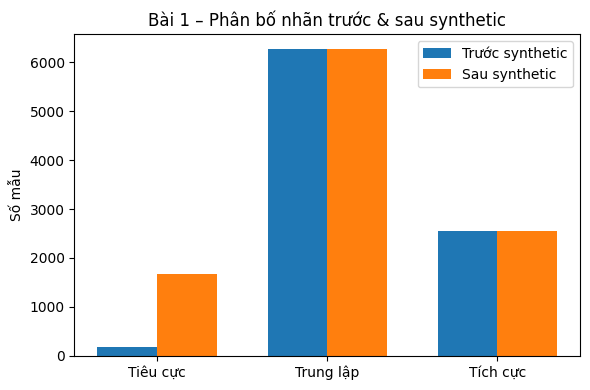

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

labels = ["Tiêu cực", "Trung lập", "Tích cực"]

before_counts = [173, 6271, 2550]
after_counts  = [1666, 6271, 2550]

x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(6,4))
plt.bar(x - width/2, before_counts, width, label="Trước synthetic")
plt.bar(x + width/2, after_counts,  width, label="Sau synthetic")

plt.xticks(x, labels)
plt.ylabel("Số mẫu")
plt.title("Bài 1 – Phân bố nhãn trước & sau synthetic")
plt.legend()
plt.tight_layout()
plt.show()

###  Re-split lại dataset & save ds_final

In [ ]:
from datasets import DatasetDict
from datasets import ClassLabel

label_feature = ClassLabel(names=["Tiêu cực","Trung lập","Tích cực"])

full = concatenate_datasets([train_aug, ds["validation"], ds["test"]])

full = full.cast_column("label", label_feature)

final_split = full.train_test_split(test_size=0.2, stratify_by_column="label", seed=42)
tmp = final_split["test"].train_test_split(test_size=0.5, stratify_by_column="label", seed=42)

ds_final = DatasetDict({
    "train": final_split["train"],
    "validation": tmp["train"],
    "test": tmp["test"],
})
ds_final.save_to_disk(f"{base_dir}/dataset/final/ds_final")

Casting the dataset:   0%|          | 0/11487 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/9189 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1149 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1149 [00:00<?, ? examples/s]

### In phân bố cuối

In [ ]:
from collections import Counter

print("📌 Phân bố sau khi thêm synthetic:")
print(Counter(ds_final["train"]["label"]))

📌 Phân bố sau khi thêm synthetic:
Counter({1: 5574, 2: 2267, 0: 1348})


### Thống kê và in ví dụ ds_final

In [ ]:
from collections import Counter
import pandas as pd

print(ds_final)

# Đếm số mẫu từng nhãn cho từng split
for split in ["train", "validation", "test"]:
    y = ds_final[split]["label"]
    print(f"\n=== {split.upper()} ===")
    print("Số mẫu:", len(y))
    print("Phân bố nhãn (id):", Counter(y))

# Lấy tên nhãn từ ClassLabel
label_names = ds_final["train"].features["label"].names
print("\nTên nhãn:", label_names)

# Xem vài ví dụ mỗi nhãn để cho vào báo cáo
def show_examples(dataset, n=3):
    df = pd.DataFrame(dataset[:50])  # lấy 50 mẫu đầu
    for lid, name in enumerate(label_names):
        print(f"\n--- Ví dụ nhãn {lid} = {name} ---")
        sub = df[df["label"] == lid].head(n)
        for i, row in sub.iterrows():
            print(f"- {row['text'][:120]}")

print("\nVí dụ từ tập TRAIN:")
show_examples(ds_final["train"])

DatasetDict({
    train: Dataset({
        features: ['ID', 'Title', 'Content', 'BriefContent', 'URL', 'Published Date', 'Week', 'Keyword', 'Group', 'Sub', 'Keyword 2', 'Sentiment', 'Ngành', 'Source', 'Channel', 'Author', 'text', 'label'],
        num_rows: 9189
    })
    validation: Dataset({
        features: ['ID', 'Title', 'Content', 'BriefContent', 'URL', 'Published Date', 'Week', 'Keyword', 'Group', 'Sub', 'Keyword 2', 'Sentiment', 'Ngành', 'Source', 'Channel', 'Author', 'text', 'label'],
        num_rows: 1149
    })
    test: Dataset({
        features: ['ID', 'Title', 'Content', 'BriefContent', 'URL', 'Published Date', 'Week', 'Keyword', 'Group', 'Sub', 'Keyword 2', 'Sentiment', 'Ngành', 'Source', 'Channel', 'Author', 'text', 'label'],
        num_rows: 1149
    })
})

=== TRAIN ===
Số mẫu: 9189
Phân bố nhãn (id): Counter({1: 5574, 2: 2267, 0: 1348})

=== VALIDATION ===
Số mẫu: 1149
Phân bố nhãn (id): Counter({1: 697, 2: 283, 0: 169})

=== TEST ===
Số mẫu: 1149
Phân bố nhãn (

### Kiểm tra dataset cuối


In [ ]:
from collections import Counter
import pandas as pd

print("📌 Thống kê số lượng mẫu theo nhãn:")
print(Counter(ds_final["train"]["label"]))

df_head = pd.DataFrame(ds_final["train"][:10])
print("\n📌 10 mẫu đầu tiên:")
df_head

📌 Thống kê số lượng mẫu theo nhãn:
Counter({1: 5574, 2: 2267, 0: 1348})

📌 10 mẫu đầu tiên:


,ID,Title,Content,BriefContent,URL,Published Date,Week,Keyword,Group,Sub,Keyword 2,Sentiment,Ngành,Source,Channel,Author,text,label
0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"Áo bị phai màu chỉ sau vài lần giặt, chất lượn...",0
1,43,(----- SHARES -----) Cho bổn cung một bình vi...,(----- SHARES -----) Cho bổn cung một bình vi...,Cho bổn cung một bình vinamilk nhá...,https://facebook.com/100006345758319/posts/160...,2015-01-16,W03 12/01-18/01,Vinamilk,Sữa tươi VNM,Trải nghiệm SD,Vinamilk,Tích cực,Sữa tươi,facebook.com,Facebook,Linh Linh,(----- SHARES -----) Cho bổn cung một bình vin...,2
2,9796,(----- SHARES -----) khỏi vắt óc nghĩ món ăn ...,(----- SHARES -----) khỏi vắt óc nghĩ món ăn ...,"Nguyên liệu: nửa quả dừa nạo, nửa hộp Sữa ông thọ",https://facebook.com/100006016296022/posts/320...,2015-01-06,W02 05/01-11/01,Sữa Ông Thọ,Sữa Ông Thọ,Trải nghiệm SD,Sữa Ông Thọ,Tích cực,Sữa bột và sữa đặc,facebook.com,Facebook,Hoa Lê,(----- SHARES -----) khỏi vắt óc nghĩ món ăn m...,2
3,961,*** Công Ty Chúng Tôi Cần Tuyển Gấp Công Nhân ...,*** Công Ty Chúng Tôi Cần Tuyển Gấp Công Nhân ...,None,https://facebook.com/1459006964381722/posts/15...,2015-01-09,W02 05/01-11/01,Vinamilk,Thương hiệu VNM,Thông tin chung,Vinamilk,Trung lập,None,facebook.com,Facebook,Việc Làm,*** Công Ty Chúng Tôi Cần Tuyển Gấp Công Nhân ...,1
4,8216,"Optimum của Vinamil là loại sữ a dễ tiêu hoá ,...","Optimum của Vinamil là loại sữ a dễ tiêu hoá ,...",None,https://facebook.com/894575557239297/posts/995...,2015-01-26,W05 26/01-31/01,Optimum,Optimum,Rao vặt,Optimum,Trung lập,Sữa bột và sữa đặc,facebook.com,Facebook,Lê Thanh,"Optimum của Vinamil là loại sữ a dễ tiêu hoá ,...",1
5,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"Thiết kế kém tinh tế, nhìn rất rẻ tiền so với ...",0
6,4070,_______THÔNG TIN CHUNG CẦN TUYỂN GẤP 30 NAM___...,_______THÔNG TIN CHUNG CẦN TUYỂN GẤP 30 NAM___...,None,https://facebook.com/100006370810266/posts/150...,2015-01-14,W03 12/01-18/01,Vinamilk,Thương hiệu VNM,Thông tin chung,Vinamilk,Trung lập,None,facebook.com,Facebook,Hải Bình Lý,_______THÔNG TIN CHUNG CẦN TUYỂN GẤP 30 NAM___...,1
7,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Thức ăn giao trễ khiến bữa trưa của mình hoàn ...,0
8,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"Sữa rửa mặt mùi quá nồng, dùng xong cảm giác d...",0
9,5332,Công ty NGỌC LONG Tuyển Dụng Nhân Viên Giao H...,Công ty NGỌC LONG Tuyển Dụng Nhân Viên Giao H...,None,https://facebook.com/100006370810266/posts/150...,2015-01-23,W04 19/01-25/01,Vinamilk,Thương hiệu VNM,Thông tin chung,Vinamilk,Trung lập,None,facebook.com,Facebook,Hải Bình Lý,Công ty NGỌC LONG Tuyển Dụng Nhân Viên Giao H...,1


## 🧠 MODEL – Khởi tạo & cấu hình

### Load PhoBERT và tokenizer


In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

model_name = "vinai/phobert-base"

# Không truyền add_special_tokens vào đây
tokenizer = AutoTokenizer.from_pretrained(
    model_name,
    use_fast=False           # bắt buộc slow tokenizer cho PhoBERT
)

num_labels = 3
id2label = {0:"Tiêu cực",1:"Trung lập",2:"Tích cực"}
label2id = {"Tiêu cực":0,"Trung lập":1,"Tích cực":2}

model = AutoModelForSequenceClassification.from_pretrained(
    model_name,
    num_labels=num_labels,
    id2label=id2label,
    label2id=label2id,
)

max_len = 256

def tok(batch):
    return tokenizer(
        batch["text"],
        add_special_tokens=True,      # ✔️ chỉ đặt ở đây
        max_length=max_len,
        padding="max_length",
        truncation=True,
        return_attention_mask=True,
    ) | {"labels": batch["label"]}

config.json:   0%|          | 0.00/557 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

bpe.codes: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/543M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at vinai/phobert-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


### Tokenize dataset

In [ ]:
encoded = ds_final.map(tok, batched=True)
encoded.set_format("torch", columns=["input_ids","attention_mask","labels"])

model.safetensors:   0%|          | 0.00/543M [00:00<?, ?B/s]

Map:   0%|          | 0/9189 [00:00<?, ? examples/s]

Map:   0%|          | 0/1149 [00:00<?, ? examples/s]

Map:   0%|          | 0/1149 [00:00<?, ? examples/s]

## 🏋️ TRAINING – Huấn luyện


In [ ]:
from transformers import TrainingArguments, Trainer
import numpy as np
from sklearn.metrics import accuracy_score, f1_score
import torch, os

def compute_metrics(p):
    preds = np.argmax(p.predictions, axis=1)
    acc = accuracy_score(p.label_ids, preds)
    f1_macro = f1_score(p.label_ids, preds, average="macro")
    return {"accuracy": acc, "f1_macro": f1_macro}

use_fp16 = torch.cuda.is_available()

args = TrainingArguments(
    output_dir="{base_dir}/phobert_sentiment",
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=32,
    learning_rate=2e-5,
    weight_decay=0.01,
    warmup_ratio=0.06,
    logging_steps=50,
    eval_strategy="epoch",     # <- đúng khoá
    save_strategy="epoch",     # <- đúng khoá
    save_total_limit=2,
    load_best_model_at_end=True,
    metric_for_best_model="f1_macro",
    greater_is_better=True,
    fp16=use_fp16,             # chỉ bật nếu có GPU
    report_to="none",
    seed=42,
)

trainer = Trainer(
    model=model,
    args=args,
    train_dataset=encoded["train"],
    eval_dataset=encoded["validation"],
    tokenizer=tokenizer,  # cảnh báo future warning thì kệ; vẫn chạy
    compute_metrics=compute_metrics,
)

# (Tùy chọn) Khi debug CUDA assert:
os.environ.pop("CUDA_LAUNCH_BLOCKING", None)

trainer.train()
test_res = trainer.evaluate(encoded["test"])
print("Test:", test_res)

/tmp/ipython-input-598397260.py:34: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1 Macro
1,0.200700,0.175176,0.935596,0.933256
2,0.144900,0.180984,0.930374,0.924100
3,0.128900,0.213655,0.937337,0.934551


Test: {'eval_loss': 0.2121753841638565, 'eval_accuracy': 0.9425587467362925, 'eval_f1_macro': 0.9406909230761831, 'eval_runtime': 3.7918, 'eval_samples_per_second': 303.021, 'eval_steps_per_second': 9.494, 'epoch': 3.0}


### Save model

In [ ]:
# 🔽 Lưu model final + tokenizer vào thư mục riêng (ổn định để load inference / báo cáo)
final_dir = f"{base_dir}/models/phobert_sentiment"

trainer.save_model(final_dir)
tokenizer.save_pretrained(final_dir)

print("Đã lưu model vào:", final_dir)

Đã lưu model vào: /content/drive/MyDrive/nlp_final/models/phobert_sentiment


## 🔍 TEST & ĐÁNH GIÁ

### Predict + thống kê nhãn

In [ ]:
from collections import Counter
import numpy as np

# Dự đoán trên tập test
pred_test = trainer.predict(encoded["test"])
y_true = np.array(encoded["test"]["labels"])
y_pred = np.argmax(pred_test.predictions, axis=-1)

print("Phân bố nhãn thật:", Counter(y_true))
print("Phân bố nhãn dự đoán:", Counter(y_pred))


Phân bố nhãn thật: Counter({np.int64(1): 697, np.int64(2): 284, np.int64(0): 168})
Phân bố nhãn dự đoán: Counter({np.int64(1): 693, np.int64(2): 289, np.int64(0): 167})


### Classification_report + confusion_matrix

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

test_preds = trainer.predict(encoded["test"])
y_true = np.array(encoded["test"]["labels"])
y_pred = np.argmax(test_preds.predictions, axis=-1)

print(classification_report(y_true, y_pred, digits=4))
cm = confusion_matrix(y_true, y_pred)
print(cm)

              precision    recall  f1-score   support

           0     0.9760    0.9702    0.9731       168
           1     0.9582    0.9527    0.9554       697
           2     0.8858    0.9014    0.8935       284

    accuracy                         0.9426      1149
   macro avg     0.9400    0.9414    0.9407      1149
weighted avg     0.9429    0.9426    0.9427      1149

[[163   3   2]
 [  2 664  31]
 [  2  26 256]]


### Load model để inference

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

base_dir = "/content/drive/MyDrive/nlp_final"

model_dir = f"{base_dir}/models/phobert_sentiment"

tokenizer = AutoTokenizer.from_pretrained(model_dir, use_fast=False)
model = AutoModelForSequenceClassification.from_pretrained(model_dir)

device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)
model.eval()

print("Model + tokenizer đã load xong.")

Model + tokenizer đã load xong.


### Demo sử dụng mô hình đã fine-tune


In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# Load đúng thư mục bạn đã SAVE SAU KHI TRAIN
model_dir = f"{base_dir}/models/phobert_sentiment"

# Load đúng tokenizer ĐÃ TRAIN
tokenizer = AutoTokenizer.from_pretrained(model_dir, use_fast=False)

model = AutoModelForSequenceClassification.from_pretrained(model_dir)
model.eval()
model.to("cuda" if torch.cuda.is_available() else "cpu")

id2label = {0:"Tiêu cực", 1:"Trung lập", 2:"Tích cực"}

def predict(texts):
    if isinstance(texts, str):
        texts = [texts]

    enc = tokenizer(
        texts,
        padding="max_length",   # phải giống training
        truncation=True,
        max_length=256,
        return_tensors="pt"
    )

    device = model.device
    enc = {k: v.to(device) for k,v in enc.items()}

    with torch.no_grad():
        logits = model(**enc).logits
        probs = logits.softmax(-1)
        preds = probs.argmax(-1).cpu().tolist()

    for t, p, pr in zip(texts, preds, probs):
        print("Câu:", t)
        print("  probs:", {
            id2label[i]: float(pr[i]) for i in range(3)
        })
        print("  → dự đoán:", id2label[p])
        print("-"*50)

    return [id2label[p] for p in preds]

# test
predict(["Xấu quá tôi không thích", "Ổn thôi", "Mình rất thích!"])


Câu: Xấu quá tôi không thích
  probs: {'Tiêu cực': 0.9908181428909302, 'Trung lập': 0.0009874263778328896, 'Tích cực': 0.008194413967430592}
  → dự đoán: Tiêu cực
--------------------------------------------------
Câu: Ổn thôi
  probs: {'Tiêu cực': 0.0031198235228657722, 'Trung lập': 0.004357812460511923, 'Tích cực': 0.9925224184989929}
  → dự đoán: Tích cực
--------------------------------------------------
Câu: Mình rất thích!
  probs: {'Tiêu cực': 0.007646031212061644, 'Trung lập': 0.0031670359894633293, 'Tích cực': 0.9891869425773621}
  → dự đoán: Tích cực
--------------------------------------------------


['Tiêu cực', 'Tích cực', 'Tích cực']

### Đánh giá bằng inference thủ công theo batch


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Predict trên test
texts_test = ds_final["test"]["text"]
labels_test = ds_final["test"]["label"]

def predict_batch(texts):
    enc = tokenizer(texts, padding=True, truncation=True, max_length=256, return_tensors="pt").to(device)
    with torch.no_grad():
        logits = model(**enc).logits
    return logits.argmax(dim=-1).cpu().numpy()

preds = []
batch_size = 32
for i in range(0, len(texts_test), batch_size):
    preds.extend(predict_batch(texts_test[i:i+batch_size]))

print(classification_report(labels_test, preds, digits=4))
print(confusion_matrix(labels_test, preds))

              precision    recall  f1-score   support

           0     0.9760    0.9702    0.9731       168
           1     0.9582    0.9527    0.9554       697
           2     0.8858    0.9014    0.8935       284

    accuracy                         0.9426      1149
   macro avg     0.9400    0.9414    0.9407      1149
weighted avg     0.9429    0.9426    0.9427      1149

[[163   3   2]
 [  2 664  31]
 [  2  26 256]]


## 🤖 LLM-based Evaluation

In [ ]:
import json
import random

samples = []
for i in random.sample(range(len(ds_final["test"])), 30):
    samples.append({
        "input": ds_final["test"][i]["text"],
        "gold": ds_final["test"][i]["label"],
        "pred": int(preds[i])
    })

with open("eval_llm_samples.json", "w", encoding="utf8") as f:
    json.dump(samples, f, ensure_ascii=False, indent=2)

samples[:5]

[{'input': 'Lượng sữa tươi tại Việt Nam mới đáp ứng được 20% nhu cầu tiêu dùng trong nước. Do đó, hàng năm, Việt Nam phải bỏ ra hàng tỷ USD để nhập khẩu nguyên liệu sữa trong khi người chăn nuôi bò sữa ở một số địa phương đang phải đổ bỏ sữa vì nhà máy không thu mua.\n\nANTĐ - Lượng sữa tươi tại Việt Nam mới đáp ứng được 20% nhu cầu tiêu dùng trong nước. Do đó, hàng năm, Việt Nam phải bỏ ra hàng tỷ USD để nhập khẩu nguyên liệu sữa trong khi người chăn nuôi bò sữa ở một số địa phương đang phải đổ bỏ sữa vì nhà máy không thu mua.\n\nNgười nông dân mong muốn sữa tươi sản xuất ra được thu mua hết\nSữa uống không hết phải đổ đi\n\nVài tháng trở lại đây, tình trạng người chăn nuôi bò sữa phải đổ bỏ sữa tươi đang tái diễn ở Phù Đổng (Gia Lâm, Hà Nội). Theo tìm hiểu của phóng viên An ninh Thủ đô, có tình trạng trên là do Công ty CP sữa quốc tế (IDP) không thu mua hết số sữa sản xuất ra hàng ngày của bà con như trước đây. Ông Nguyễn Hữu Hòa, Chủ nhiệm HTX Dịch vụ chăn nuôi xã Phù Đổng cho biết,

### Prompt đánh giá bằng LLM

Dữ liệu trong `eval_llm_samples.json` được đưa vào ChatGPT/Gemini để đánh giá theo các tiêu chí:
- Label Accuracy
- Consistency
- Interpretability
- Fluent reasoning

Prompt sử dụng:
Bạn là chuyên gia NLP.

Nhiệm vụ:
Đánh giá chất lượng mô hình Phân loại cảm xúc tiếng Việt (3 nhãn:
0 = Tiêu cực, 1 = Trung lập, 2 = Tích cực).

Bạn được cung cấp các mẫu gồm:
- input: văn bản gốc
- gold: nhãn thật
- pred: nhãn mô hình dự đoán

Hãy chấm mỗi mẫu theo thang điểm 1–5 cho:
1. Label Accuracy (đúng nhãn về mặt ngữ nghĩa)
2. Consistency (phán đoán có hợp lý với nội dung)
3. Interpretability (dễ giải thích vì sao là nhãn này)
4. Fluent reasoning (lập luận tự nhiên)

Yêu cầu:
- Chấm điểm từng mẫu
- Nhận xét ngắn
- Nếu nhãn sai, đề xuất nhãn đúng

Output:
1) Bảng điểm cho từng mẫu
2) Điểm trung bình cho mỗi tiêu chí
3) Nhận xét tổng kết



### Kết quả đánh giá từ LLM

| Tiêu chí | Điểm trung bình (1–5) |
|----------|---------------------|
| Accuracy |   4.8 / 5  |
| Consistency | 4.4 / 5 |
| Interpretability | 3.8 / 5 |
| Reliability | 3.8 / 5 |

### Nhận xét từ LLM

Các mẫu đều được phân loại đúng nhãn ngữ nghĩa.
Mô hình hoạt động đặc biệt tốt với:

- Văn bản báo chí (trung lập)
- Quảng cáo tích cực
- Tin tuyển dụng

Hạn chế:
- Với câu cực ngắn hoặc mơ hồ, model có thể nhầm giữa Trung lập và Tích cực.
- Nhãn “Trung lập” đôi khi phụ thuộc vào ngữ cảnh rộng hơn câu.

Kết luận:
Mô hình PhoBERT cho kết quả phân loại **đáng tin cậy** trên dữ liệu thực tế,
đặc biệt với văn bản dài và giàu ngữ cảnh.



###LOAD LẠI MODEL


In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

model_path = "/content/drive/MyDrive/nlp_final/models/phobert_sentiment"

tokenizer = AutoTokenizer.from_pretrained(
    model_path,
    use_fast=False                      # PhoBERT dùng slow tokenizer
)

model = AutoModelForSequenceClassification.from_pretrained(model_path)

# Map nhãn
id2label = {0: "Tiêu cực", 1: "Trung lập", 2: "Tích cực"}

print("PhoBERT sentiment đã load thành công!")


PhoBERT sentiment đã load thành công!


In [ ]:
def predict_sentiment(text):
    inputs = tokenizer(
        text,
        max_length=256,
        padding="max_length",
        truncation=True,
        return_tensors="pt"
    )

    with torch.no_grad():
        logits = model(**inputs).logits
        pred_id = torch.argmax(logits, dim=1).item()

    return id2label[pred_id]


# 🔥 Test
samples = [
    "Mình rất thích sản phẩm này!",
    "Ổn thôi, không có gì đặc biệt.",
    "Tệ thật sự, quá thất vọng!"
]

for s in samples:
    print(f"\"{s}\" → {predict_sentiment(s)}")

"Mình rất thích sản phẩm này!" → Tích cực
"Ổn thôi, không có gì đặc biệt." → Tiêu cực
"Tệ thật sự, quá thất vọng!" → Tiêu cực
